In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Détection des valeurs aberrantes avec la méthode de l'Intervalle inter quartiles

In [42]:
# 1. Chargement du fichier
df = pd.read_csv('../RAW_data/produits.csv')

# 2. Aperçu des premières lignes
print("Aperçu du fichier :")
display(df.head())

# 3. Infos générales (types, NaNs...)
print("\nInfos sur les colonnes :")
display(df.info())

# 4. Suppression des doublons
df = df.drop_duplicates()

# 5. Affichage des valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
display(df.isnull().sum())

# 6. Suppression ou remplissage des valeurs manquantes
# Exemple : on remplit les colonnes numériques avec la moyenne
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Exemple : on remplit les colonnes catégorielles avec la valeur la plus fréquente
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 7. Vérification du nettoyage
print("\nAperçu après nettoyage :")
display(df.head())



Aperçu du fichier :


,id_produit;catégorie;marque;prix;stock_minimum
0,P00001;Soins capillaires;Luxe Éclat;467.42;52
1,P00002;Accessoires;Maison Pure;291.26;10
2,P00003;Maquillage;Essentielle Paris;354.39;60
3,P00004;Accessoires;Reflet d’Or;462.8;33
4,P00005;Accessoires;Élixir Haute Beauté;359.47;33



Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id_produit;catégorie;marque;prix;stock_minimum  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


None


Valeurs manquantes par colonne :


id_produit;catégorie;marque;prix;stock_minimum    0
dtype: int64


Aperçu après nettoyage :


C:\Users\Jules\AppData\Local\Temp\ipykernel_4964\141607680.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,id_produit;catégorie;marque;prix;stock_minimum
0,P00001;Soins capillaires;Luxe Éclat;467.42;52
1,P00002;Accessoires;Maison Pure;291.26;10
2,P00003;Maquillage;Essentielle Paris;354.39;60
3,P00004;Accessoires;Reflet d’Or;462.8;33
4,P00005;Accessoires;Élixir Haute Beauté;359.47;33


In [43]:

outliers = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # On garde les lignes considérées comme aberrantes
    mask_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_count = mask_outliers.sum()
    
    if outliers_count > 0:
        outliers[col] = df[mask_outliers]

# Affichage des résultats
if outliers:
    for col, data in outliers.items():
        print(f"\nValeurs aberrantes détectées dans la colonne '{col}' ({len(data)} valeurs) :")
        display(data[[col]])
else:
    print("✅ Aucune valeur aberrante détectée dans les colonnes numériques.")


✅ Aucune valeur aberrante détectée dans les colonnes numériques.


In [44]:
# Vérifie s'il y a des doublons (lignes identiques)
duplicated_rows = df[df.duplicated()]

# Affiche le nombre de doublons
print(f"Nombre de lignes dupliquées : {duplicated_rows.shape[0]}")

# Affiche les lignes dupliquées si elles existent
if not duplicated_rows.empty:
    print("Voici les doublons :")
    display(duplicated_rows)
else:
    print("✅ Aucun doublon détecté.")

Nombre de lignes dupliquées : 0
✅ Aucun doublon détecté.


In [45]:
# 1. Affiche les colonnes catégorielles (object ou category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégorielles :")
print(list(cat_cols))

# 2. Affiche les valeurs uniques pour chaque colonne catégorielle
print("\nValeurs uniques par colonne catégorielle :")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("-" * 30)

Colonnes catégorielles :
['id_produit;catégorie;marque;prix;stock_minimum']

Valeurs uniques par colonne catégorielle :

--- id_produit;catégorie;marque;prix;stock_minimum ---
id_produit;catégorie;marque;prix;stock_minimum
P01000;Maquillage;Héritage Sensuel;60.7;31          1
P00001;Soins capillaires;Luxe Éclat;467.42;52       1
P00002;Accessoires;Maison Pure;291.26;10            1
P00003;Maquillage;Essentielle Paris;354.39;60       1
P00004;Accessoires;Reflet d’Or;462.8;33             1
                                                   ..
P00013;Accessoires;Essentielle Paris;236.4;61       1
P00012;Maquillage;Maison Pure;464.27;20             1
P00011;Soins capillaires;Luxe Éclat;468.5;40        1
P00010;Accessoires;Élixir Haute Beauté;373.49;67    1
P00009;Maquillage;Reflet d’Or;223.58;30             1
Name: count, Length: 1000, dtype: int64
------------------------------


In [46]:
# Pour une belle mise en forme des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# 1. Colonnes catégorielles
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("🎯 Colonnes catégorielles :", list(cat_cols))

# 2. Affichage des valeurs uniques et graphiques barres
for col in cat_cols:
    print(f"\n🔸 {col} - Top catégories")
    print(df[col].value_counts().head(10))
    

🎯 Colonnes catégorielles : ['id_produit;catégorie;marque;prix;stock_minimum']

🔸 id_produit;catégorie;marque;prix;stock_minimum - Top catégories
id_produit;catégorie;marque;prix;stock_minimum
P01000;Maquillage;Héritage Sensuel;60.7;31          1
P00001;Soins capillaires;Luxe Éclat;467.42;52       1
P00002;Accessoires;Maison Pure;291.26;10            1
P00003;Maquillage;Essentielle Paris;354.39;60       1
P00004;Accessoires;Reflet d’Or;462.8;33             1
P00005;Accessoires;Élixir Haute Beauté;359.47;33    1
P00006;Parfums;Luxe Éclat;93.22;26                  1
P00007;Maquillage;Maison Pure;296.62;14             1
P00984;Parfums;Ligne Lumière;423.62;81              1
P00983;Soins capillaires;Épure d'Azur;142.24;82     1
Name: count, dtype: int64



📊 Analysis by Category:

Products per Category:


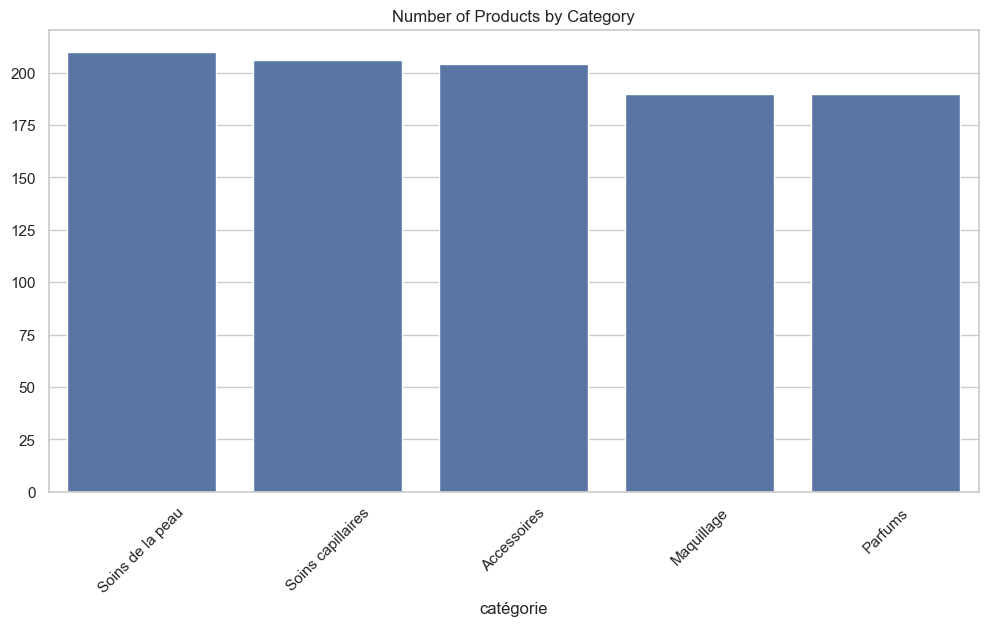


🏢 Top 10 Brands:


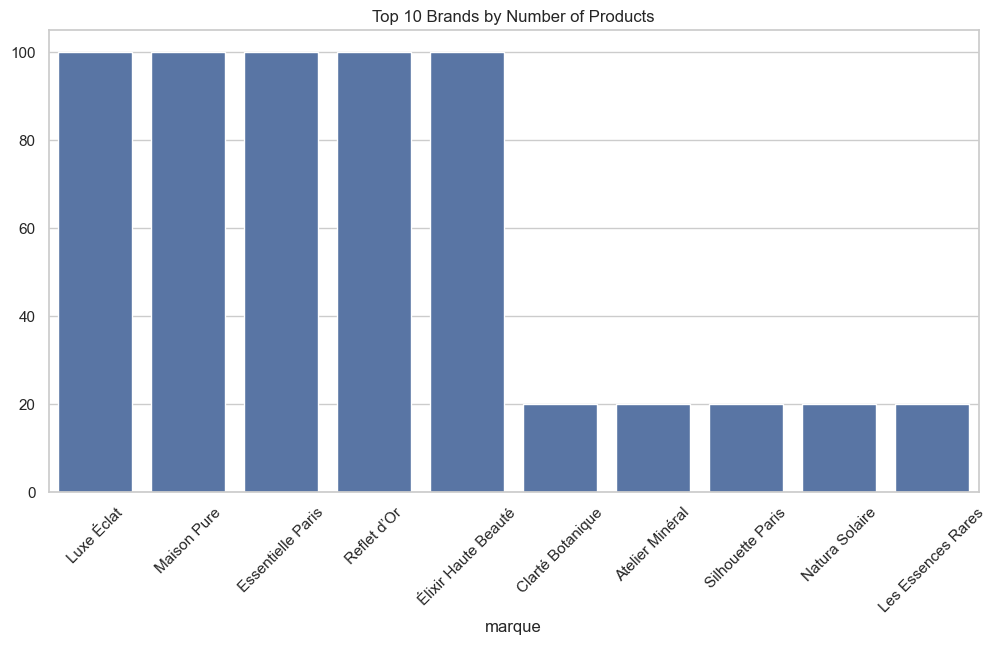

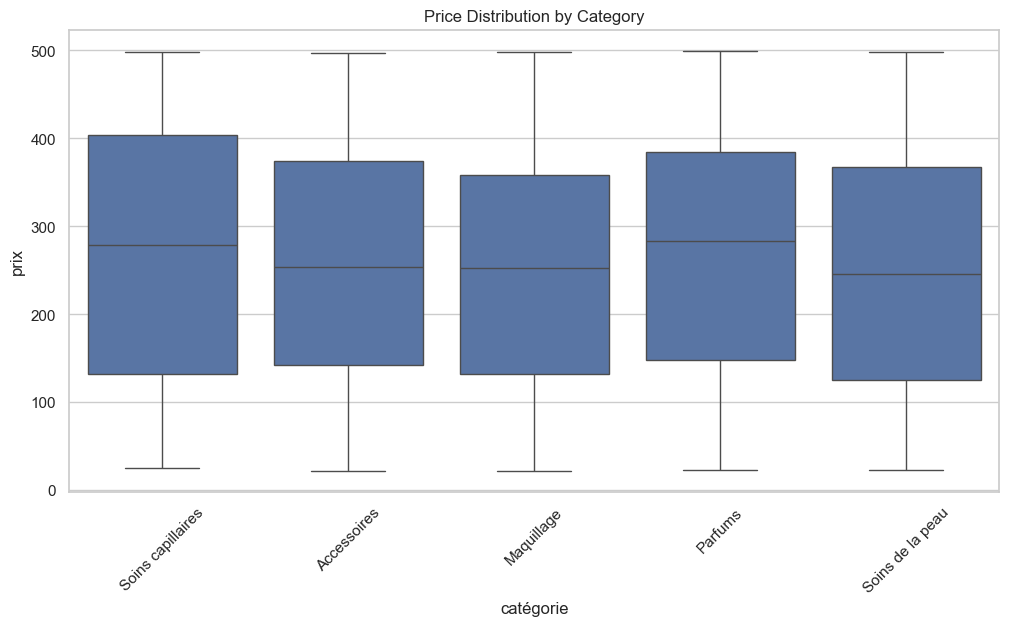


📈 Statistical Summary by Category:
                   count        mean         std    min       25%      50%  \
catégorie                                                                    
Accessoires        204.0  256.353725  139.652926  22.37  142.4950  254.075   
Maquillage         190.0  253.791895  137.474208  22.22  132.2550  252.660   
Parfums            190.0  268.465947  135.781981  23.07  148.4075  283.625   
Soins capillaires  206.0  270.261699  149.843141  25.28  131.7250  278.880   
Soins de la peau   210.0  251.991381  139.113257  22.76  124.8750  245.560   

                        75%     max  
catégorie                            
Accessoires        373.7325  497.56  
Maquillage         358.6275  498.24  
Parfums            384.6800  499.72  
Soins capillaires  403.9525  498.62  
Soins de la peau   367.5900  498.41  

📦 Stock Level Analysis:


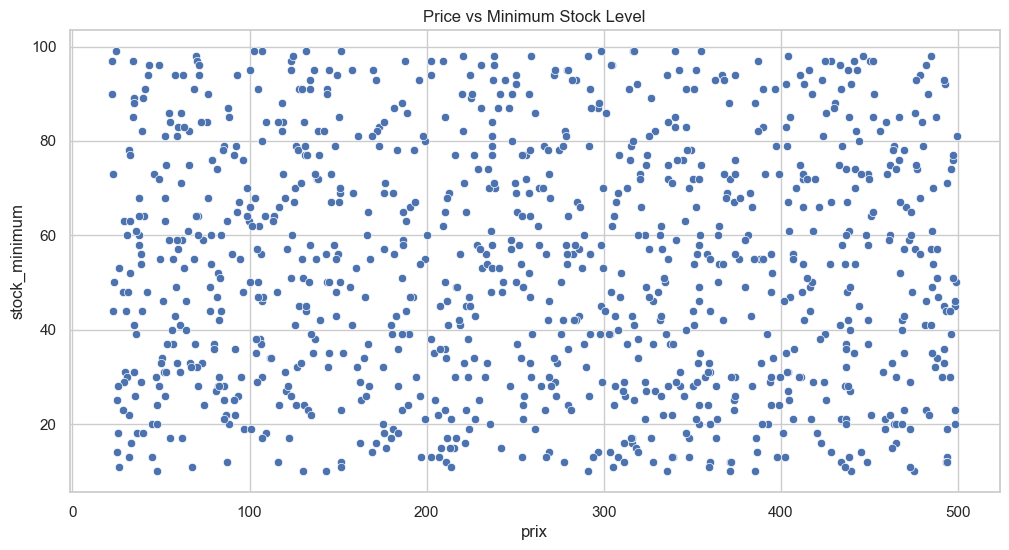


🔍 Outlier Analysis:

Outliers in prix:
Number of outliers: 0
Outlier values:
Series([], Name: prix, dtype: float64)

Outliers in stock_minimum:
Number of outliers: 0
Outlier values:
Series([], Name: stock_minimum, dtype: int64)


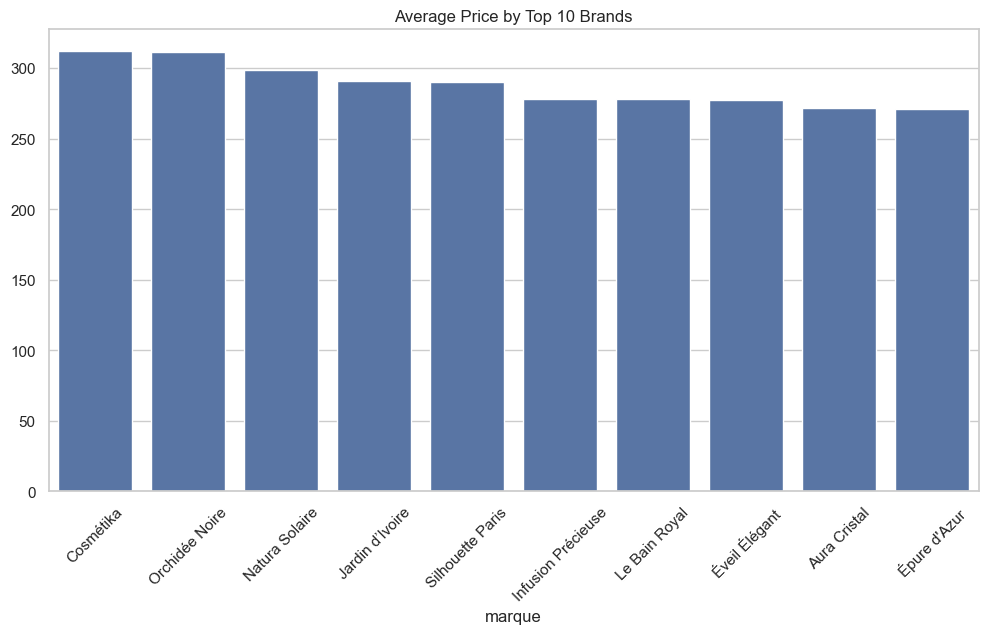


✅ Data Quality Check:

Duplicate Products:
0

Value Ranges:

prix:
Min: 22.22
Max: 499.72
Mean: 260.12
Median: 262.09000000000003

stock_minimum:
Min: 10
Max: 99
Mean: 53.40
Median: 54.0


In [49]:
# 8. Category Analysis
print("\n📊 Analysis by Category:")
print("\nProducts per Category:")
# Calculate category counts
category_counts = df['catégorie'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45)
plt.title('Number of Products by Category')
plt.show()

# 9. Brand Analysis
print("\n🏢 Top 10 Brands:")
brand_counts = df['marque'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.xticks(rotation=45)
plt.title('Top 10 Brands by Number of Products')
plt.show()

# 10. Price Analysis by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='catégorie', y='prix', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Category')
plt.show()

# 11. Statistical Summary by Category
print("\n📈 Statistical Summary by Category:")
print(df.groupby('catégorie')['prix'].describe())

# 12. Stock Analysis
print("\n📦 Stock Level Analysis:")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='prix', y='stock_minimum')
plt.title('Price vs Minimum Stock Level')
plt.show()

# 13. Outlier Detection using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

print("\n🔍 Outlier Analysis:")
for col in ['prix', 'stock_minimum']:
    outliers = detect_outliers(df, col)
    print(f"\nOutliers in {col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values:\n{outliers.head()}")

# 14. Brand Price Analysis
plt.figure(figsize=(12, 6))
top_brands = df.groupby('marque')['prix'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xticks(rotation=45)
plt.title('Average Price by Top 10 Brands')
plt.show()

# 15. Data Quality Check
print("\n✅ Data Quality Check:")
print("\nDuplicate Products:")
print(df['id_produit'].duplicated().sum())

print("\nValue Ranges:")
for col in ['prix', 'stock_minimum']:
    print(f"\n{col}:")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median()}")